# Sumador de Draper

In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.compiler import assemble, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
IBMQ.save_account('f33574e4ee70dc79fa2cc13196842a585bd84475ea12349568c2c649874d3a9bec1c6b58c70de7d7406b83d41b26368d0fd6ec73671834b56911a6f0cbbb1c31')

configrc.store_credentials:WARNING:2021-04-18 01:00:46,071: Credentials already present. Set overwrite=True to overwrite.


In [2]:
def qft_4qbits(qc):

    qc.h(3)
    qc.cp(pi/2,2,3)
    qc.cp(pi/4,1,3)
    qc.cp(pi/8,0,3)

    qc.h(2)
    qc.cp(pi/2,1,2)
    qc.cp(pi/4,0,2)

    qc.h(1)
    qc.cp(pi/2,0,1)

    qc.h(0)
          
    qc.swap(0,3)
    qc.swap(1,2)
    
    
def inverse_qft_4qbits(qc):
    
    qc.swap(0,3)
    qc.swap(1,2)
    
    qc.h(0)
    
    qc.cp(-pi/2,0,1)
    qc.h(1)
    
    qc.cp(-pi/4,0,2)
    qc.cp(-pi/2,1,2)
    qc.h(2)
    
    qc.cp(-pi/8,0,3)
    qc.cp(-pi/4,1,3)
    qc.cp(-pi/2,2,3)  
    qc.h(3)

    
def adder(qc):
    
    qc.cp(pi/8,7,0)
    qc.cp(pi/4,6,0)
    qc.cp(pi/2,5,0)
    qc.cp(pi,4,0)
    
    qc.barrier()
    
    qc.cp(pi/4,7,1)
    qc.cp(pi/2,6,1)
    qc.cp(pi,5,1)
    
    qc.barrier()
    
    qc.cp(pi/2,7,2)
    qc.cp(pi,6,2)
    
    qc.barrier()
    
    qc.cp(pi,7,3)
    
    qc.barrier()

In [3]:
qc = QuantumCircuit(8,8) #4qbits para A y 4 para B

#inicializo A a |1101> (13 en binario)
qc.x(3)
qc.x(2)
qc.x(0)

#inicializo B a |0001> (1 en binario)
qc.x(7)

qc.barrier()
qft_4qbits(qc)

qc.barrier()
adder(qc)

qc.barrier()
inverse_qft_4qbits(qc)

qc.barrier()
qc.measure([0,1,2,3,4,5,6,7],[0,1,2,3,4,5,6,7])

qc.draw()

┌───┐ ░                                                                  »
q_0: ┤ X ├─░───────────────────────────────────■───────────────────■──────────»
     └───┘ ░                                   │                   │     ┌───┐»
q_1: ──────░────────────────────■──────────────┼─────────■─────────┼─────┤ H ├»
     ┌───┐ ░                    │     ┌───┐    │     ┌───┴────┐┌───┴────┐└───┘»
q_2: ┤ X ├─░──────────■─────────┼─────┤ H ├────┼─────┤ P(π/2) ├┤ P(π/4) ├─────»
     ├───┤ ░ ┌───┐┌───┴────┐┌───┴────┐└───┘┌───┴────┐└────────┘└────────┘     »
q_3: ┤ X ├─░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─────┤ P(π/8) ├─────────────────────────»
     └───┘ ░ └───┘└────────┘└────────┘     └────────┘                         »
q_4: ──────░──────────────────────────────────────────────────────────────────»
           ░                                                                  »
q_5: ──────░──────────────────────────────────────────────────────────────────»
           ░                                                                  »
q_6: ──────░──────────────────────────────────────────────────────────────────»
     ┌───┐ ░                                                                  »
q_7: ┤ X ├─░──────────────────────────────────────────────────────────────────»
     └───┘ ░                                                                  »
c: 8/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«               ┌───┐    ░ ┌────────┐┌────────┐┌────────┐┌──────┐ ░           »
«q_0: ────■─────┤ H ├─X──░─┤ P(π/8) ├┤ P(π/4) ├┤ P(π/2) ├┤ P(π) ├─░───────────»
«     ┌───┴────┐└───┘ │  ░ └───┬────┘└───┬────┘└───┬────┘└──┬───┘ ░ ┌────────┐»
«q_1: ┤ P(π/2) ├──X───┼──░─────┼─────────┼─────────┼────────┼─────░─┤ P(π/4) ├»
«     └────────┘  │   │  ░     │         │         │        │     ░ └───┬────┘»
«q_2: ────────────X───┼──░─────┼─────────┼─────────┼────────┼─────░─────┼─────»
«                     │  ░     │         │         │        │     ░     │     »
«q_3: ────────────────X──░─────┼─────────┼─────────┼────────┼─────░─────┼─────»
«                        ░     │         │         │        │     ░     │     »
«q_4: ───────────────────░─────┼─────────┼─────────┼────────■─────░─────┼─────»
«                        ░     │         │         │              ░     │     »
«q_5: ───────────────────░─────┼─────────┼─────────■──────────────░─────┼─────»
«                        ░     │         │                        ░     │     »
«q_6: ───────────────────░─────┼─────────■────────────────────────░─────┼─────»
«                        ░     │                                  ░     │     »
«q_7: ───────────────────░─────■──────────────────────────────────░─────■─────»
«                        ░                                        ░           »
«c: 8/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                        ░                    ░          ░  ░    ┌───┐»
«q_0: ───────────────────░────────────────────░──────────░──░──X─┤ H ├»
«     ┌────────┐┌──────┐ ░                    ░          ░  ░  │ └───┘»
«q_1: ┤ P(π/2) ├┤ P(π) ├─░────────────────────░──────────░──░──┼───X──»
«     └───┬────┘└──┬───┘ ░ ┌────────┐┌──────┐ ░          ░  ░  │   │  »
«q_2: ────┼────────┼─────░─┤ P(π/2) ├┤ P(π) ├─░──────────░──░──┼───X──»
«         │        │     ░ └───┬────┘└──┬───┘ ░ ┌──────┐ ░  ░  │      »
«q_3: ────┼────────┼─────░─────┼────────┼─────░─┤ P(π) ├─░──░──X──────»
«         │        │     ░     │        │     ░ └──┬───┘ ░  ░         »
«q_4: ────┼────────┼─────░─────┼────────┼─────░────┼─────░──░─────────»
«         │        │     ░     │        │     ░    │     ░  ░         »
«q_5: ────┼────────■─────░─────┼────────┼─────░────┼─────░──░─────────»
«         │              ░     │        │     ░    │     ░  ░         »
«q_6: ────■──────────────░───

In [4]:
sim = Aer.get_backend("qasm_simulator")
job = execute(qc,sim,shots=1000)
result = job.result()
counts = result.get_counts(qc)

print(counts)

{'10001110': 1000}


### Comentarios:

No he conseguido que me funcione como ponía en el guion de la practica (usando esto como la parte del adder):

def adder(qc):
    
    qc.cp(pi,4,0)
    
    qc.barrier()
    
    qc.cp(pi,5,1)
    qc.cp(pi/2,4,1)
    
    qc.barrier()
    
    qc.cp(pi,6,2)
    qc.cp(pi/2,5,2)
    qc.cp(pi/4,4,2)
    
    qc.barrier()
    
    qc.cp(pi,7,3)
    qc.cp(pi/2,6,3)
    qc.cp(pi/4,5,3)
    qc.cp(pi/8,4,3)
    
Pero me funcionaba con el adder que tengo actualmente aunque el número B está inverso (los 4 bits más significativos), es decir que si nos da el resultado 1000 1110, significa que he sumado 0001 a 1101 y nos da 1110.

1101 + 0001 = 1110

Como vemos al hacer 1101 + 0001 = 1110, nos da el resultado esperado un 100% de las veces pudiendo demostrar que el sumador de Draper funciona.

## Ejecución en un backend real

In [5]:
# First, see what devices we are allowed to use by loading our saved accounts
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

/home/feynman/anaconda3/envs/qiskitEnv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [6]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 8 and
                                   not b.configuration().simulator and b.status().operational==True))

In [7]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_qc, shots=shots)
job = backend.run(qobj)
job_monitor(job)

Job Status: job has successfully run


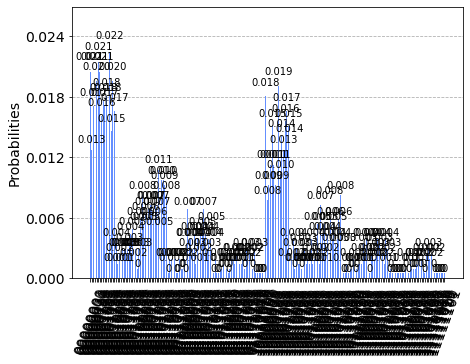

In [8]:
counts = job.result().get_counts()
plot_histogram(counts)

In [9]:
counts

{'00000000': 42,
 '00000001': 26,
 '00010000': 8,
 '00010001': 3,
 '00010010': 5,
 '00010011': 3,
 '00010100': 6,
 '00010101': 6,
 '00010110': 6,
 '00010111': 6,
 '00011000': 7,
 '00011001': 9,
 '00011010': 10,
 '00011011': 4,
 '00011100': 6,
 '00011101': 2,
 '00011110': 6,
 '00011111': 12,
 '00000010': 35,
 '00100000': 17,
 '00100001': 11,
 '00100010': 13,
 '00100011': 11,
 '00100100': 14,
 '00100101': 15,
 '00100110': 15,
 '00100111': 12,
 '00101000': 15,
 '00101001': 14,
 '00101010': 22,
 '00101011': 10,
 '00101100': 20,
 '00101101': 20,
 '00101110': 19,
 '00101111': 17,
 '00000011': 42,
 '00110000': 1,
 '00110001': 4,
 '00110010': 4,
 '00110100': 3,
 '00110101': 4,
 '00110110': 1,
 '00110111': 1,
 '00111000': 4,
 '00111001': 2,
 '00111010': 2,
 '00111100': 4,
 '00111101': 1,
 '00000100': 40,
 '01000000': 14,
 '01000001': 8,
 '01000010': 8,
 '01000011': 6,
 '01000100': 9,
 '01000101': 3,
 '01000110': 8,
 '01000111': 5,
 '01001000': 9,
 '01001001': 10,
 '01001010': 14,
 '01001011': 9

Hay mucho ruido y la solución que queremos solo aparece 31 veces

## Sumador de Draper con AQFT

In [10]:
def aqft_4qbits_2rot(qc):

    qc.h(3)
    qc.cp(pi/2,2,3)
    qc.cp(pi/4,1,3)
    qc.barrier()

    qc.h(2)
    qc.cp(pi/2,1,2)
    qc.cp(pi/4,0,2)
    qc.barrier()

    qc.h(1)
    qc.cp(pi/2,0,1)
    qc.barrier()

    qc.h(0)
          
    qc.swap(0,3)
    qc.swap(1,2)
    
def inverse_aqft_4qbits_2rot(qc):
    
    qc.swap(0,3)
    qc.swap(1,2)
    
    qc.h(0)
    
    qc.barrier()
    qc.cp(-pi/2,0,1)        
    qc.h(1)
    
    qc.barrier()
    qc.cp(-pi/4,0,2)
    qc.cp(-pi/2,1,2)
    qc.h(2)
    
    qc.barrier()   
    qc.cp(-pi/4,1,3)    
    qc.cp(-pi/2,2,3)    
    qc.h(3)    

In [11]:
qc = QuantumCircuit(8,8) #4qbits para A y 4 para B

#inicializo A a |1101> (13 en binario)
qc.x(3)
qc.x(2)
qc.x(0)

#inicializo B a |0001> (1 en binario)
qc.x(7)

qc.barrier()
aqft_4qbits_2rot(qc)

qc.barrier()
adder(qc)

qc.barrier()
inverse_aqft_4qbits_2rot(qc)

qc.barrier()
qc.measure([0,1,2,3,4,5,6,7],[0,1,2,3,4,5,6,7])

qc.draw()

┌───┐ ░                           ░                           ░      »
q_0: ┤ X ├─░───────────────────────────░────────────────────■──────░──────»
     └───┘ ░                           ░                    │      ░ ┌───┐»
q_1: ──────░────────────────────■──────░──────────■─────────┼──────░─┤ H ├»
     ┌───┐ ░                    │      ░ ┌───┐┌───┴────┐┌───┴────┐ ░ └───┘»
q_2: ┤ X ├─░──────────■─────────┼──────░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░──────»
     ├───┤ ░ ┌───┐┌───┴────┐┌───┴────┐ ░ └───┘└────────┘└────────┘ ░      »
q_3: ┤ X ├─░─┤ H ├┤ P(π/2) ├┤ P(π/4) ├─░───────────────────────────░──────»
     └───┘ ░ └───┘└────────┘└────────┘ ░                           ░      »
q_4: ──────░───────────────────────────░───────────────────────────░──────»
           ░                           ░                           ░      »
q_5: ──────░───────────────────────────░───────────────────────────░──────»
           ░                           ░                           ░      »
q_6: ──────░───────────────────────────░───────────────────────────░──────»
     ┌───┐ ░                           ░                           ░      »
q_7: ┤ X ├─░───────────────────────────░───────────────────────────░──────»
     └───┘ ░                           ░                           ░      »
c: 8/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                ░ ┌───┐    ░ ┌────────┐┌────────┐┌────────┐┌──────┐ ░ »
«q_0: ────■──────░─┤ H ├─X──░─┤ P(π/8) ├┤ P(π/4) ├┤ P(π/2) ├┤ P(π) ├─░─»
«     ┌───┴────┐ ░ └───┘ │  ░ └───┬────┘└───┬────┘└───┬────┘└──┬───┘ ░ »
«q_1: ┤ P(π/2) ├─░───X───┼──░─────┼─────────┼─────────┼────────┼─────░─»
«     └────────┘ ░   │   │  ░     │         │         │        │     ░ »
«q_2: ───────────░───X───┼──░─────┼─────────┼─────────┼────────┼─────░─»
«                ░       │  ░     │         │         │        │     ░ »
«q_3: ───────────░───────X──░─────┼─────────┼─────────┼────────┼─────░─»
«                ░          ░     │         │         │        │     ░ »
«q_4: ───────────░──────────░─────┼─────────┼─────────┼────────■─────░─»
«                ░          ░     │         │         │              ░ »
«q_5: ───────────░──────────░─────┼─────────┼─────────■──────────────░─»
«                ░          ░     │         │                        ░ »
«q_6: ───────────░──────────░─────┼─────────■────────────────────────░─»
«                ░          ░     │                                  ░ »
«q_7: ───────────░──────────░─────■──────────────────────────────────░─»
«                ░          ░                                        ░ »
«c: 8/═════════════════════════════════════════════════════════════════»
«                                                                      »
«                                  ░                    ░          ░  ░    »
«q_0: ─────────────────────────────░────────────────────░──────────░──░──X─»
«     ┌────────┐┌────────┐┌──────┐ ░                    ░          ░  ░  │ »
«q_1: ┤ P(π/4) ├┤ P(π/2) ├┤ P(π) ├─░────────────────────░──────────░──░──┼─»
«     └───┬────┘└───┬────┘└──┬───┘ ░ ┌────────┐┌──────┐ ░          ░  ░  │ »
«q_2: ────┼─────────┼────────┼─────░─┤ P(π/2) ├┤ P(π) ├─░──────────░──░──┼─»
«         │         │        │     ░ └───┬────┘└──┬───┘ ░ ┌──────┐ ░  ░  │ »
«q_3: ────┼─────────┼────────┼─────░─────┼────────┼─────░─┤ P(π) ├─░──░──X─»
«         │         │        │     ░     │        │     ░ └──┬───┘ ░  ░    »
«q_4: ────┼─────────┼────────┼─────░─────┼────────┼─────░────┼─────░──░────»
«         │         │        │     ░     │        │     ░    │     ░  ░    »
«q_5: ────┼─────────┼────────■─────░─────┼────────┼─────░────┼─────░──░────»
«         │         │              ░     │        │     ░    │     ░  ░    »
«q_6: ────┼─────────■──────────────░─────┼────────■─────░────┼─────░──░────»
«         │                        ░     │              ░    │     ░  ░    »
«q_7: ────■────────

In [12]:
sim = Aer.get_backend("qasm_simulator")
job = execute(qc,sim,shots=1000)
result = job.result()
counts = result.get_counts(qc)

print(counts)

{'10000110': 37, '10001110': 963}


 ### Comentarios:
    
Con la AQFT nos dá el resultado obtenido una mayor parte del tiempo, pero es cierto que hay una pequeña cantidad de ocasiones en las que nos devuelve un resultado erroneo.

## Ejecución en un backend real

In [13]:
# First, see what devices we are allowed to use by loading our saved accounts
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

ibmqfactory.load_account:WARNING:2021-04-18 15:44:28,138: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 8 and
                                   not b.configuration().simulator and b.status().operational==True))

In [ ]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_qc, shots=shots)
job = backend.run(qobj)
job_monitor(job)

Job Status: job is queued (None)  

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)

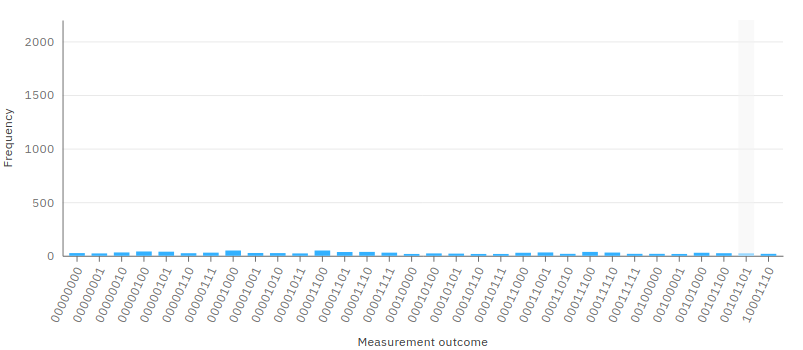

Al igual que con la QFT el ruido es muy alto y sale muy pocas veces el resultado esperado